In [15]:
import pandas as pd
from psifr import fr
import importlib
import seaborn as sns
data = pd.read_csv('/Users/morton/PycharmProjects/cmr_cfr/data/MortEtal13.csv')
data

,subject,list,position,trial_type,item,item_number,session,list_type,category,response,response_time,list_category
0,1,1,1,study,TOWEL,743,1,pure,obj,3.0,1.517,obj
1,1,1,2,study,LADLE,631,1,pure,obj,3.0,1.404,obj
2,1,1,3,study,THERMOS,735,1,pure,obj,3.0,0.911,obj
3,1,1,4,study,LEGO,637,1,pure,obj,3.0,0.883,obj
4,1,1,5,study,BACKPACK,521,1,pure,obj,3.0,0.819,obj
...,...,...,...,...,...,...,...,...,...,...,...,...
71224,47,48,12,recall,CD,560,3,mixed,obj,3.0,1.592,mixed
71225,47,48,13,recall,SURGE PROTECTOR,727,3,mixed,obj,4.0,1.305,mixed
71226,47,48,14,recall,DOORKNOB,576,3,mixed,obj,4.0,1.467,mixed
71227,47,48,15,recall,LENIN MAUSOLEUM,364,3,mixed,loc,4.0,1.123,mixed


In [2]:
study = data.query('trial_type == "study"').copy()
recall = data.query('trial_type == "recall"').copy()
merged = fr.merge_lists(study, recall, list_keys=['session', 'distractor'],
                        study_keys=['category'])

In [8]:
'input' in merged

True

In [19]:
merged.loc[(merged['subject'] == 201) & (merged['list'] == 1)]

,subject,list,item,input,output,study,recall,repeat,intrusion,session,distractor,category
0,201,1,MASCARA,1.0,NaN,True,False,0,False,1,0.0,obj
1,201,1,GOLF CLUB,2.0,NaN,True,False,0,False,1,0.0,obj
2,201,1,KEYCHAIN,3.0,NaN,True,False,0,False,1,0.0,obj
3,201,1,LOS ANGELES,4.0,NaN,True,False,0,False,1,0.0,loc
4,201,1,GETTYSBURG,5.0,9.0,True,True,0,False,1,0.0,loc
5,201,1,LIBRARY OF CONGRESS,6.0,NaN,True,False,0,False,1,0.0,loc
6,201,1,KATE WINSLET,7.0,11.0,True,True,0,False,1,0.0,cel
7,201,1,KEVIN SPACEY,8.0,NaN,True,False,0,False,1,0.0,cel
8,201,1,WOLF BLITZER,9.0,7.0,True,True,0,False,1,0.0,cel
9,201,1,DANE COOK,10.0,10.0,True,True,0,False,1,0.0,cel


In [46]:
import os
res_dir = '/Users/morton/PycharmProjects/cmr_cfr/scripts'
rec = merged.groupby(['subject', 'distractor', 'input'])['recall'].mean()
rec = rec.reset_index().rename(columns={'input': 'serialpos'})
rec.to_csv(os.path.join(res_dir, 'MortPoly17_spc_indiv.csv'), index=False)

m_rec = rec.groupby(['distractor', 'serialpos'])['recall'].mean()
m_rec = m_rec.reset_index()
m_rec.to_csv(os.path.join(res_dir, 'MortPoly17_spc.csv'), index=False)

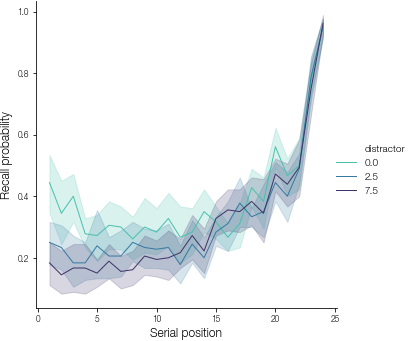

In [60]:
recall = merged.groupby('distractor').apply(fr.spc)
palette = sns.color_palette("mako_r", 3)
fr.plot_spc(recall, hue='distractor', palette=palette);

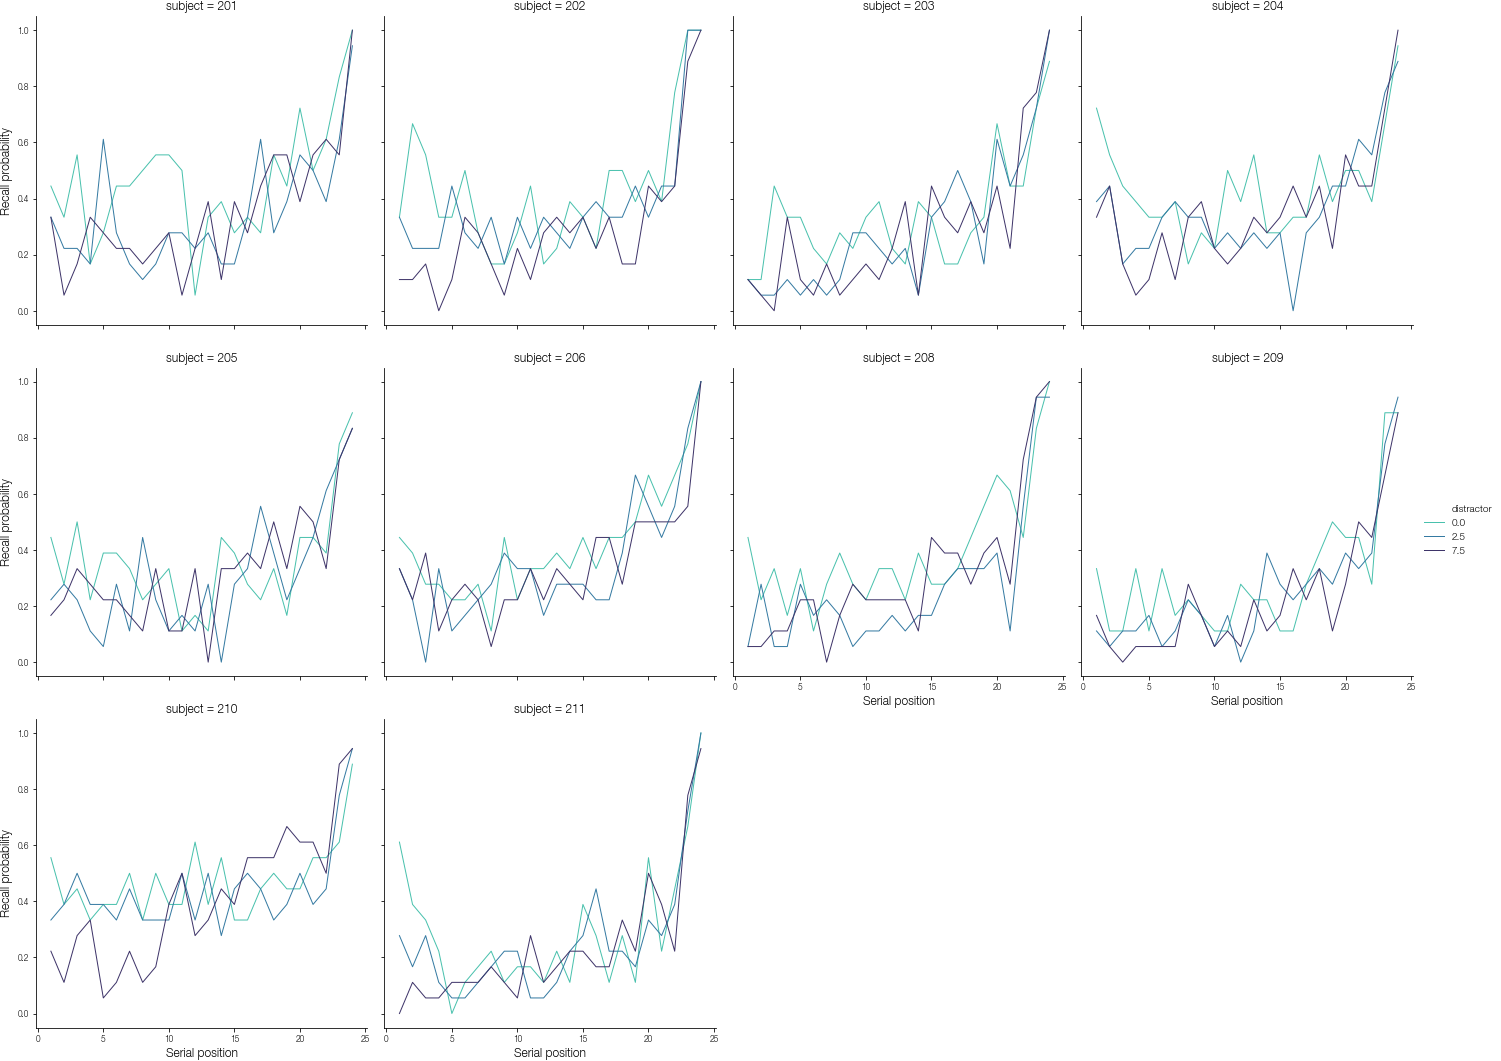

In [61]:
g = fr.plot_spc(recall, hue='distractor', col='subject', col_wrap=4,
                palette=palette)

In [10]:
results = fr.lag_crp(merged)

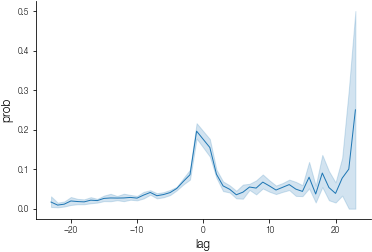

In [34]:
sns.lineplot(x='lag', y='prob', data=results.reset_index())

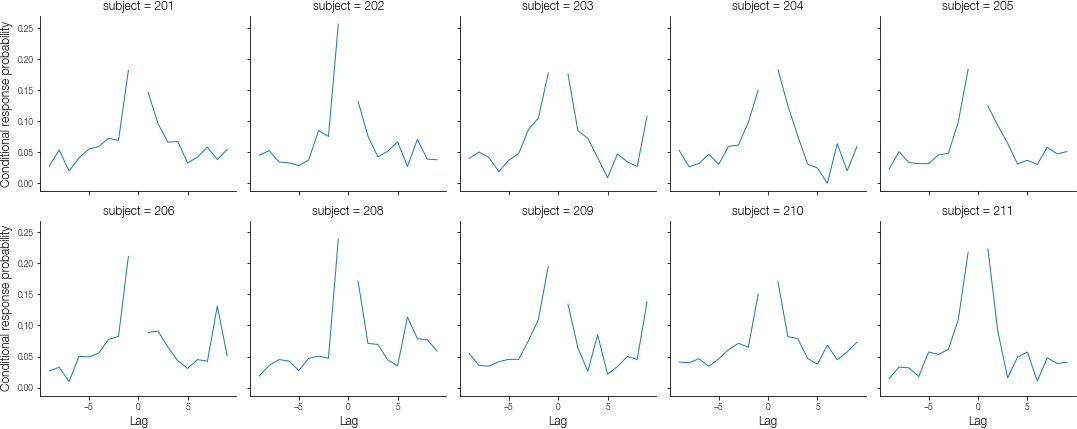

In [39]:
importlib.reload(fr)
fr.plot_lag_crp(results, 10, col='subject', col_wrap=5)

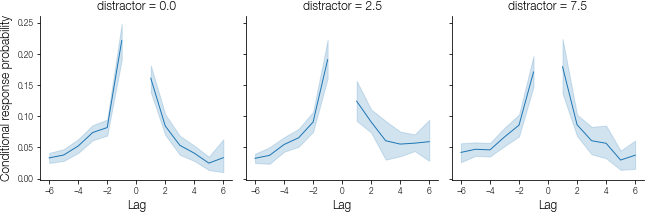

In [57]:
importlib.reload(fr)
results = merged.groupby('distractor').apply(fr.lag_crp)
fr.plot_lag_crp(results, 6, col='distractor');

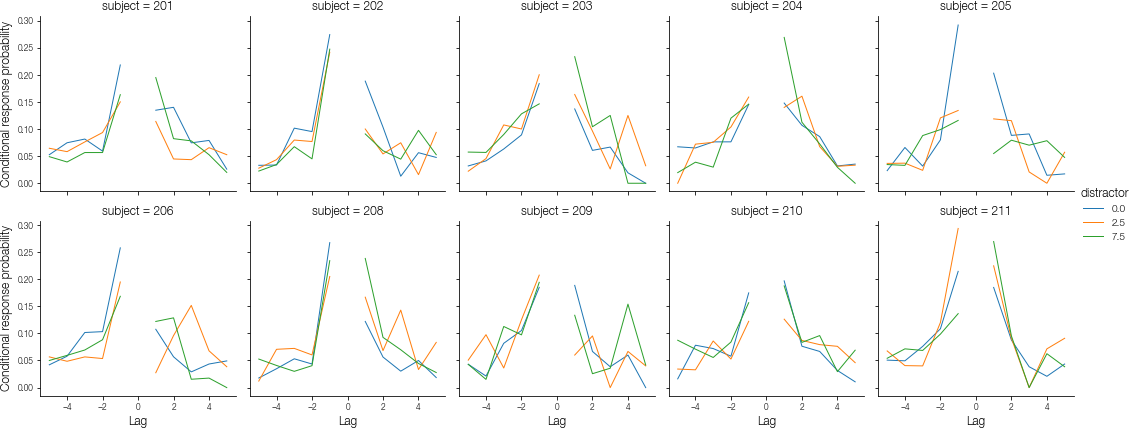

In [56]:
importlib.reload(fr)
g = fr.plot_lag_crp(results, 6, col='subject', col_wrap=5, hue='distractor')
g.add_legend()

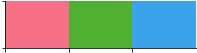

In [73]:
sns.palplot(sns.color_palette('husl', 3))

In [77]:
recall = fr.spc(merged)
recall

recall
subject input          
201     1.0    0.370370
        2.0    0.203704
        3.0    0.314815
        4.0    0.222222
        5.0    0.388889
...                 ...
211     20.0   0.462963
        21.0   0.296296
        22.0   0.351852
        23.0   0.722222
        24.0   0.981481

[240 rows x 1 columns]

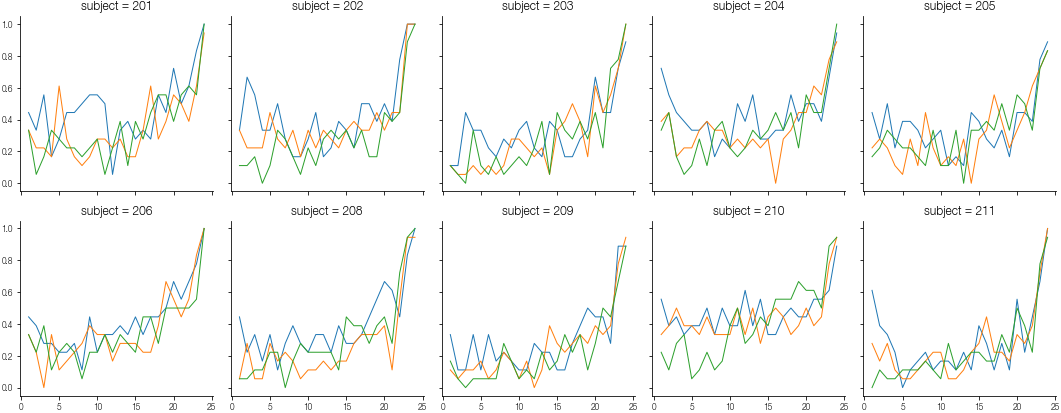

In [86]:
recall = merged.groupby('distractor').apply(fr.spc)
g = sns.FacetGrid(col='subject', col_wrap=5, hue='distractor', data=recall.reset_index())
g.map_dataframe(sns.lineplot, x='input', y='recall')

> /Users/morton/PycharmProjects/psifr/src/psifr/fr.py(278)plot_spc()
-> sns.lineplot(x='input', y='recall', hue=label, palette=palette,


(Pdb)  l


273  	
274  	    color : str
275  	        Color input accepted by seaborn.lineplot.
276  	    """
277  	    breakpoint()
278  ->	    sns.lineplot(x='input', y='recall', hue=label, palette=palette,
279  	                 data=data.reset_index())
280  	
281  	
282  	def lag_crp(df, item_query=None, test_key=None, test=None):
283  	    """Lag-CRP for multiple subjects.


(Pdb)  p palette


[(0.9677975592919913, 0.44127456009157356, 0.5358103155058701), (0.3126890019504329, 0.6928754610296064, 0.1923704830330379), (0.23299120924703914, 0.639586552066035, 0.9260706093977744)]


(Pdb)  p len(palette)


3


(Pdb)  q


BdbQuit: 

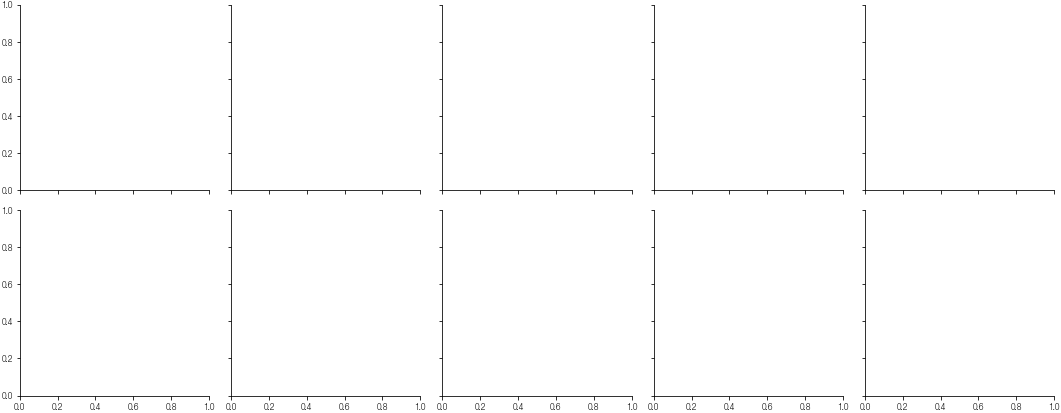

In [74]:
importlib.reload(fr)
recall = merged.groupby(['distractor']).apply(fr.spc)
g = sns.FacetGrid(col='subject', col_wrap=5, hue='distractor', data=recall.reset_index())
g.map_dataframe(fr.plot_spc, palette=sns.color_palette('husl', 3))

In [57]:
importlib.reload(fr)
recall = fr.spc(merged)
recall

recall
subject input          
201     1.0    0.370370
        2.0    0.203704
        3.0    0.314815
        4.0    0.222222
        5.0    0.388889
...                 ...
211     20.0   0.462963
        21.0   0.296296
        22.0   0.351852
        23.0   0.722222
        24.0   0.981481

[240 rows x 1 columns]

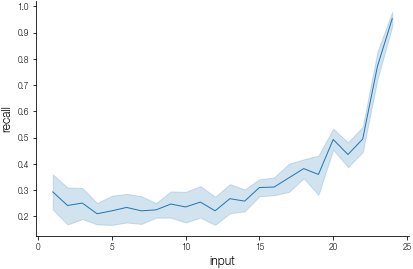

In [52]:
from psifr import fr
import importlib
importlib.reload(fr)
recall = fr.spc(merged)
fr.plot_spc(recall)

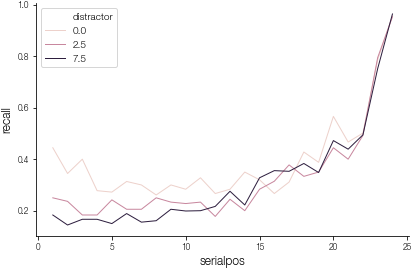

In [48]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
sns.lineplot(x='serialpos', y='recall', hue='distractor', 
             legend='full', data=m_rec, ax=ax)
fig.savefig(os.path.join(res_dir, 'MortPoly17_spc.pdf'))

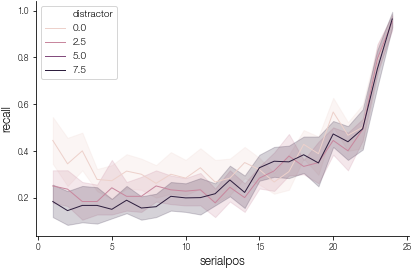

In [35]:
import seaborn as sns
sns.lineplot(x='serialpos', y='recall', hue='distractor', data=rec)

In [24]:
crp = fr.lag_crp(merged)
crp

prob  actual  possible
subject lag                              
201     -23.0  0.000000       0        51
        -22.0  0.000000       0        86
        -21.0  0.009009       1       111
        -20.0  0.044444       6       135
        -19.0  0.025478       4       157
...                 ...     ...       ...
211      19.0  0.086957       2        23
         20.0  0.000000       0        18
         21.0  0.000000       0        10
         22.0  0.000000       0         3
         23.0       NaN       0         0

[470 rows x 3 columns]